# Exploring Rental Price Trends Across the U.S. Using Data Visualization

## U.S. Apartment Rental Trends: Key Insights
### Insights from UCI Apartment for Rent Classifieds Dataset

###  Code

/opt/anaconda3/lib/python3.12/site-packages/ucimlrepo/fetch.py:97: DtypeWarning:

Columns (0,5,6,12,14,15) have mixed types. Specify dtype option on import or set low_memory=False.



Dataset loaded successfully.
First few rows of the dataset:
           id                category                            title  \
0  5668640009  housing/rent/apartment       One BR 507 & 509 Esplanade   
1  5668639818  housing/rent/apartment      Three BR 146 Lochview Drive   
2  5668639686  housing/rent/apartment  Three BR 3101 Morningside Drive   
3  5668639659  housing/rent/apartment            Two BR 209 Aegean Way   
4  5668639374  housing/rent/apartment         One BR 4805 Marquette NE   

                                                body amenities bathrooms  \
0  This unit is located at 507 & 509 Esplanade, R...       NaN         1   
1  This unit is located at 146 Lochview Drive, Ne...       NaN       1.5   
2  This unit is located at 3101 Morningside Drive...       NaN         2   
3  This unit is located at 209 Aegean Way, Vacavi...       NaN         1   
4  This unit is located at 4805 Marquette NE, Alb...       NaN         1   

  bedrooms currency fee  has_photo  ..

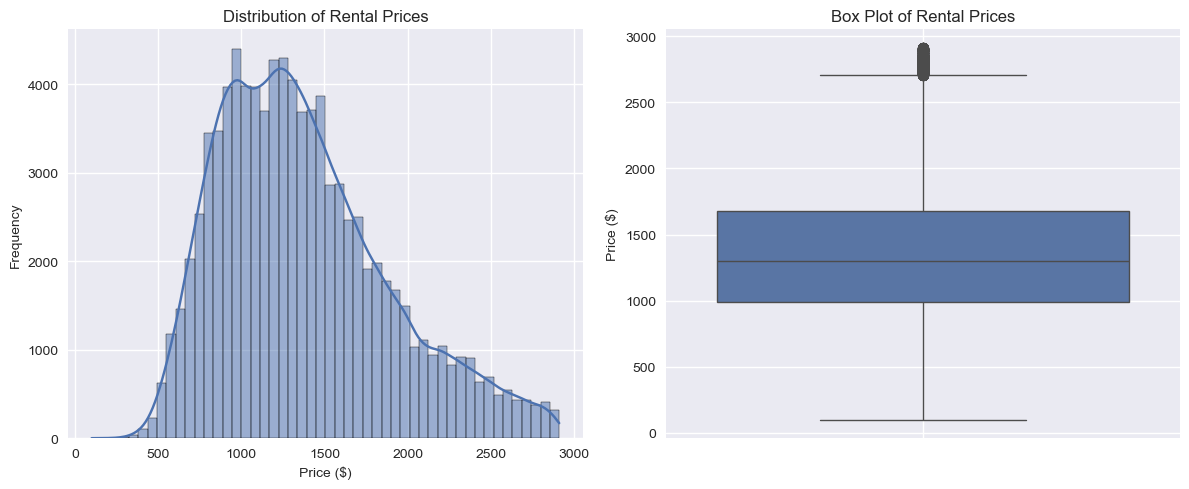

/var/folders/2j/zj0qfkhn7wjdr3q8fz2tmn_00000gn/T/ipykernel_70937/727409253.py:88: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



<Figure size 1400x600 with 0 Axes>

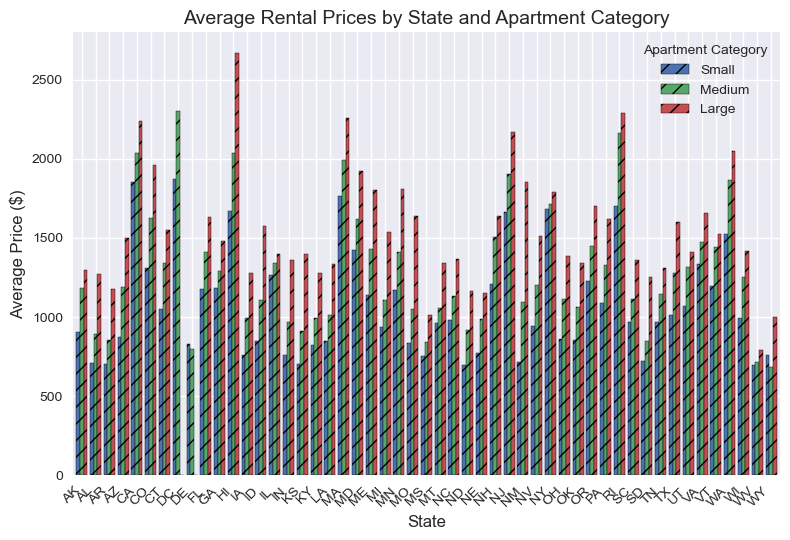

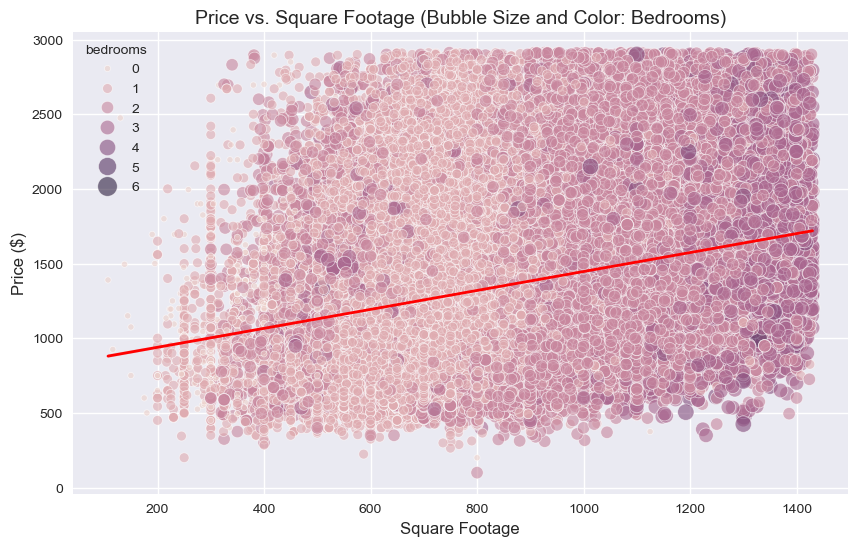

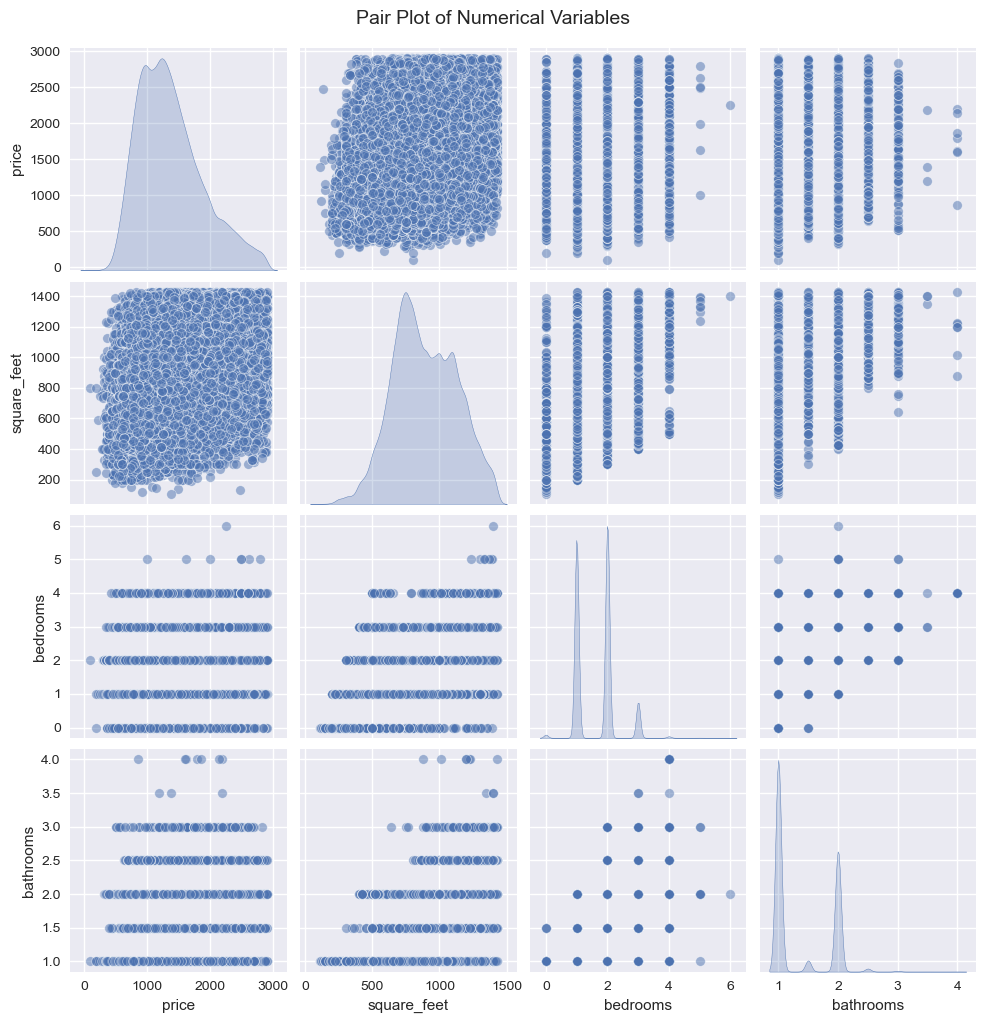

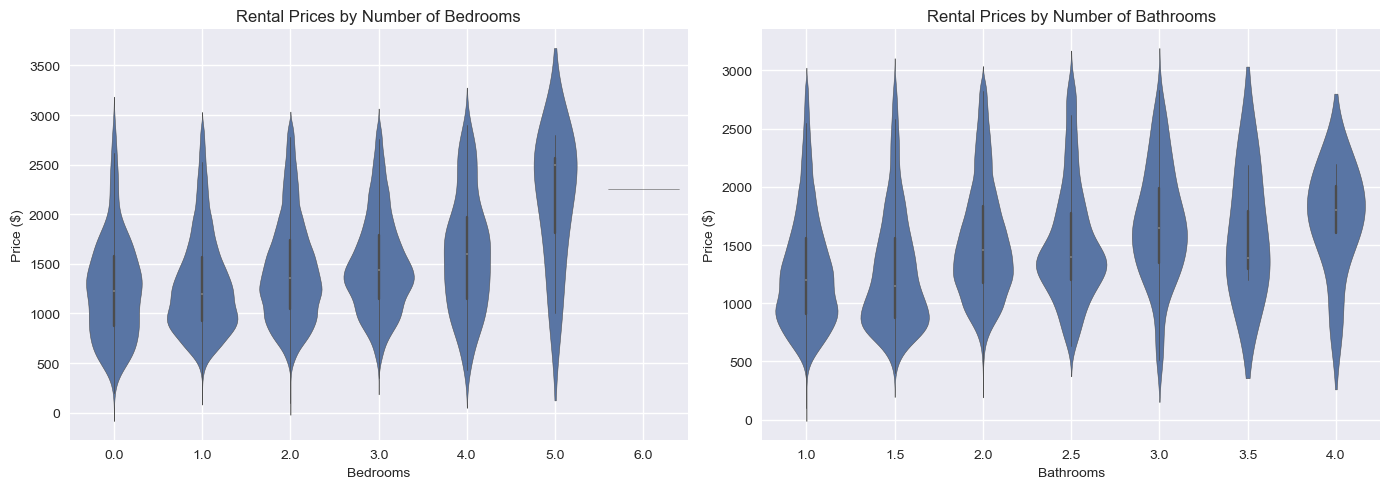

In [9]:
# Step 1: Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.figure_factory as ff
from ucimlrepo import fetch_ucirepo

# Step 2: Set colorblind-friendly palette
sns.set_palette('colorblind')  # Seaborn colorblind palette
plt.style.use('seaborn-v0_8')

# Step 3: Load dataset from UCI ML Repository
apartment_for_rent_classified = fetch_ucirepo(id=555)
df = apartment_for_rent_classified.data.original
print("Dataset loaded successfully.")

# Step 4: Display the first few rows of the dataset
print("First few rows of the dataset:")
print(df.head())

# Step 5: Display the shape of the dataset
print("Shape of the dataset:")
print(df.shape)

# Step 6: Data cleaning
# Print initial data types to diagnose issues
print("Initial data types:")
print(df[['price', 'square_feet', 'bedrooms', 'bathrooms', 'state']].dtypes)

# Convert columns to numeric, coercing errors to NaN
df['price'] = pd.to_numeric(df['price'], errors='coerce')
df['square_feet'] = pd.to_numeric(df['square_feet'], errors='coerce')
df['bedrooms'] = pd.to_numeric(df['bedrooms'], errors='coerce')
df['bathrooms'] = pd.to_numeric(df['bathrooms'], errors='coerce')

# Print data types after conversion
print("Data types after conversion:")
print(df[['price', 'square_feet', 'bedrooms', 'bathrooms', 'state']].dtypes)

# Remove rows with missing or invalid values in key columns
df = df.dropna(subset=['price', 'square_feet', 'bedrooms', 'bathrooms', 'state'])

# Filter out invalid values
df = df[df['price'] > 0]  # Remove non-positive prices
df = df[df['square_feet'] > 0]  # Remove non-positive square footage
df = df[df['bedrooms'] >= 0]  # Remove invalid bedroom counts
df = df[df['bathrooms'] >= 0]  # Remove invalid bathroom counts

# Cap outliers at 95th percentile for price and square footage
df = df[df['price'] <= df['price'].quantile(0.95)]
df = df[df['square_feet'] <= df['square_feet'].quantile(0.95)]

# Derive apartment category based on square footage
df['category'] = pd.cut(df['square_feet'], 
                       bins=[0, 800, 1200, float('inf')], 
                       labels=['Small', 'Medium', 'Large'])
print("Dataset shape after cleaning:", df.shape)

# Calculate the median price
median_price = df['price'].median()
print(f"The median price is: ${median_price:.2f}")

# Step 7: Visualization 1 - Histogram and Box Plot for Price Distribution
plt.figure(figsize=(12, 5))

# Histogram
plt.subplot(1, 2, 1)
sns.histplot(df['price'], bins=50, kde=True)
plt.title('Distribution of Rental Prices', fontsize=12)
plt.xlabel('Price ($)', fontsize=10)
plt.ylabel('Frequency', fontsize=10)
plt.grid(True)

# Box Plot
plt.subplot(1, 2, 2)
sns.boxplot(y=df['price'])
plt.title('Box Plot of Rental Prices', fontsize=12)
plt.ylabel('Price ($)', fontsize=10)
plt.grid(True)

plt.tight_layout()
plt.savefig('histogram-boxplot.png', bbox_inches='tight', dpi=300)
plt.show()

# Step 8: Visualization 2 - Grouped Bar Chart of Average Prices by State and Category
state_category_avg = df.groupby(['state', 'category'])['price'].mean().unstack()
plt.figure(figsize=(14, 6))
state_category_avg.plot(kind='bar', width=0.8, hatch='//', edgecolor='black')
plt.title('Average Rental Prices by State and Apartment Category', fontsize=14)
plt.xlabel('State', fontsize=12)
plt.ylabel('Average Price ($)', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.legend(title='Apartment Category')
plt.grid(True)
plt.tight_layout()
plt.savefig('grouped-bar.png', bbox_inches='tight', dpi=300)
plt.show()

# Step 9: Visualization 3 - Geographical Heatmap of Average Prices by State
state_avg_price_df = df.groupby('state')['price'].mean().reset_index()
fig = px.choropleth(
    state_avg_price_df,
    locations='state',
    locationmode='USA-states',
    color='price',
    color_continuous_scale='Magma_r',  # Reversed Magma: darker for higher rent
    scope='usa',
    title='Average Rental Prices Across U.S. States',
    labels={'price': 'Average Price ($)'}
)
fig.update_layout(title_x=0.5)
fig.show()

# Step 10: Visualization 4 - Bubble Chart (Price vs. Square Footage, Size and Color by Bedrooms)
plt.figure(figsize=(10, 6))
sns.scatterplot(x='square_feet', y='price', size='bedrooms', hue='bedrooms', sizes=(20, 200), 
                alpha=0.6, data=df)
sns.regplot(x='square_feet', y='price', data=df, scatter=False, color='red', line_kws={'linewidth':2})
plt.title('Price vs. Square Footage (Bubble Size and Color: Bedrooms)', fontsize=14)
plt.xlabel('Square Footage', fontsize=12)
plt.ylabel('Price ($)', fontsize=12)
plt.grid(True)
plt.savefig('bubble-chart.png', bbox_inches='tight', dpi=300)
plt.show()

# Step 11: Visualization 5 - Pair Plot for Numerical Variables
numerical_cols = ['price', 'square_feet', 'bedrooms', 'bathrooms']
sns.pairplot(df[numerical_cols], diag_kind='kde', plot_kws={'alpha':0.5})
plt.suptitle('Pair Plot of Numerical Variables', y=1.02, fontsize=14)
plt.show()

# Step 12: Visualization 6 - Violin Plots for Prices by Bedrooms and Bathrooms
plt.figure(figsize=(14, 5))

# Violin Plot for Bedrooms
plt.subplot(1, 2, 1)
sns.violinplot(x='bedrooms', y='price', data=df)
plt.title('Rental Prices by Number of Bedrooms', fontsize=12)
plt.xlabel('Bedrooms', fontsize=10)
plt.ylabel('Price ($)', fontsize=10)
plt.grid(True)

# Violin Plot for Bathrooms
plt.subplot(1, 2, 2)
sns.violinplot(x='bathrooms', y='price', data=df)
plt.title('Rental Prices by Number of Bathrooms', fontsize=12)
plt.xlabel('Bathrooms', fontsize=10)
plt.ylabel('Price ($)', fontsize=10)
plt.grid(True)

plt.tight_layout()
plt.savefig('violin-plots.png', bbox_inches='tight', dpi=300)
plt.show()
